In [3]:
import xarray as xr
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs 
import cartopy.feature as cfeat
from metpy.units import units
import metpy.calc as mpcalc
import cmocean as cmo
from numpy import zeros, newaxis
import shapefile as shp
import geopandas as gpd
import os
import pygrib
import cmocean
import glob
import netCDF4 as nc
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator, FixedFormatter

ERROR 1: PROJ: proj_create_from_database: Open of /home/eflicker/.conda/envs/OrionEnv/share/proj failed


In [5]:
# Observed Data
file=xr.open_dataset('/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/OISST/sst_2010_2019_1x1_neareststod.nc')
sst=file['sst']

# Flipping the order of latitude coordinates so it corresponds to model data 
filea=file.isel(lat=slice(None, None, -1))

sst2=filea['sst']

lon=sst.metpy.longitude
lat=sst.metpy.latitude
cmap=cmocean.cm.balance

# Set plot projection information

proj_data=ccrs.LambertConformal(central_longitude=100, central_latitude=38, standard_parallels=[30,45])

In [6]:
# Model data and landmask
file2=xr.open_dataset('/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20150501/gfs.t00z.flux.1p00.f0024', engine='cfgrib',
                       backend_kwargs={'filter_by_keys':{'stepType':'instant','typeOfLevel':'surface'}})
file3=file2.isel(latitude=slice(None, None, -1))
lsm=file3['lsm']
lsm2=file2['lsm']

In [7]:
jan=sst[0:31]
feb=sst[31:59]
mar=sst[59:90]
apr=sst[90:120]
may=sst[120:151]
june=sst[151:181]
july=sst[181:212]
aug=sst[212:243]
sept=sst[243:273]
octo=sst[273:304]
nov=sst[304:334]
dec=sst[334:365]

In [9]:
# Observed Sea Surface Temperature Loop: Saving Monthly Averages to Array 

afiles=[jan, feb, mar, apr, may, june, july, aug, sept, octo, nov, dec]
meansave=np.zeros([120,181,360])
x=0
r=0
cmap=cmocean.cm.balance
n1=0
n2=31
year=2010

for i in range(0,10):
       
    
    
    for k in range(len(afiles)):

        #file=xr.open_dataset('/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/OISST/sst_2010_2019_1x1_neareststod.nc')

        afa=sst2[n1:n2]
        #fileset=afiles[k]

        n1=n2
        if k==0:
            n2=n2+28

        elif k==1 or k==3 or k==5 or k==6 or k==8 or k==10 or k==11:
            n2=n2+31
        elif k==2 or k==4 or k==7 or k==9:
            n2=n2+30

        tempmean=np.mean(afa, axis=0) 
        meansave[r]=tempmean
        
        r=r+1
        print(r)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [22]:
np.save('OISST_Monthly_Averages',meansave)

In [10]:
# Would have to alter code above slightly for this, coordinates are not changed in above loop
# np.save('OISST_Monthly_Averages_Coordflipped', meansave)

In [ ]:
means=np.load('OISST_Monthly_Averages.npy')

In [36]:
# January Composite Average

January=np.zeros([10,181,360])
x=0
jans=meansave[0]
for i in range(0,10):
    janu=means[x]
    January[i]=janu
    x=x+12
    #print(x)
    
Janmean=np.mean(January, axis=0)
Janstd=np.std(January, axis=0)

In [37]:
# February Composite Average

February=np.zeros([10,181,360])
x=1

for i in range(0,10):
    febu=means[x]
    February[i]=febu
    x=x+12
    #print(x)
    
Febmean=np.mean(February, axis=0)
Febstd=np.std(February, axis=0)

In [38]:
# March Composite Average

March=np.zeros([10,181,360])
x=2

for i in range(0,10):
    marchu=means[x]
    March[i]=marchu
    x=x+12
    #print(x)
    
Marchmean=np.mean(March, axis=0)
Marchstd=np.std(March, axis=0)

In [39]:
# April Composite Average

April=np.zeros([10,181,360])
x=3

for i in range(0,10):
    apru=means[x]
    April[i]=apru
    x=x+12
    #print(x)
    
Aprilmean=np.mean(April, axis=0)
Aprilstd=np.std(April, axis=0)

In [40]:
# May Composite Average

May=np.zeros([10,181,360])
x=4

for i in range(0,10):
    mayu=means[x]
    May[i]=mayu
    x=x+12
    #print(x)
    
Maymean=np.mean(May, axis=0)
Maystd=np.std(May, axis=0)

In [41]:
# June Composite Average

June=np.zeros([10,181,360])
x=5

for i in range(0,10):
    junu=means[x]
    June[i]=junu
    x=x+12
    #print(x)
    
Junemean=np.mean(June, axis=0)
Junestd=np.std(June, axis=0)

In [42]:
# July Composite Average

July=np.zeros([10,181,360])
x=6

for i in range(0,10):
    julyu=means[x]
    July[i]=julyu
    x=x+12
    #print(x)
    
Julymean=np.mean(July, axis=0)
Julystd=np.std(July, axis=0)

In [43]:
# August Composite Average

August=np.zeros([10,181,360])
x=7

for i in range(0,10):
    augu=means[x]
    August[i]=augu
    x=x+12
    #print(x)
    
Augustmean=np.mean(August, axis=0)
Augstd=np.std(August, axis=0)

In [44]:
# September Composite Average

September=np.zeros([10,181,360])
x=8

for i in range(0,10):
    sepu=means[x]
    September[i]=sepu
    x=x+12
    #print(x)
    
Sepmean=np.mean(September, axis=0)
Sepstd=np.std(September, axis=0)

In [45]:
# October Composite Average

October=np.zeros([10,181,360])
x=9

for i in range(0,10):
    octu=means[x]
    October[i]=octu
    x=x+12
    #print(x)
    
Octmean=np.mean(October, axis=0)
Octstd=np.std(October, axis=0)

In [46]:
# November Composite Average

November=np.zeros([10,181,360])
x=10

for i in range(0,10):
    novu=means[x]
    November[i]=novu
    x=x+12
    #print(x)
    
Novmean=np.mean(November, axis=0)
Novstd=np.std(November, axis=0)

In [47]:
# December Composite Average

December=np.zeros([10,181,360])
x=11

for i in range(0,10):
    decu=means[x]
    December[i]=decu
    x=x+12
    #print(x)
    
Decmean=np.mean(December, axis=0)
Decstd=np.std(December, axis=0)

In [1]:
mo_means=[Janmean,Febmean, Marchmean,Aprilmean,Maymean,Junemean,Julymean,Augustmean,Sepmean,Octmean,Novmean,Decmean ]
months=['January', 'February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    
    actualmean=mo_means[i]
    
    res='110m'
    fig=plt.figure(figsize=(15,9))
    ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
    ax.set_extent([100, 290, -60, 60], crs=ccrs.PlateCarree())
    #ax.add_feature(cfeat.COASTLINE.with_scale(res))

    # Plot a contour-filled variable
    print('f')
    CG=ax.contourf(lon,lat,actualmean,levels=np.arange(0,32.5,0.5), cmap=cmap,extend='both', transform=ccrs.PlateCarree())
    CF=ax.contourf(lon,lat,lsm,levels=np.arange(0.25,1.5,0.5), cmap='Greys', transform=ccrs.PlateCarree())
    print('f')
    cbar=plt.colorbar(CG,fraction=0.05, pad=0.01,shrink=0.6)
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_ylabel("SST (°C)", fontsize=14)
    ax.add_patch(mpatches.Rectangle(xy=[190, -5], width=50, height=10,
                                facecolor='none', edgecolor='k', linewidth=2,
                                transform=ccrs.PlateCarree()))
    ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))


    # Title
    title=ax.set_title("Observed " + str(months[i])+ " Composite SST",fontsize=28)
    plt.savefig("Surface Temp.png", format='png')
    picfile=str(months[i]) + ' Composite Average SST ' + '.png'
    plt.savefig(picfile, format='png')
    plt.show()


NameError: name 'Janmean' is not defined

f
f


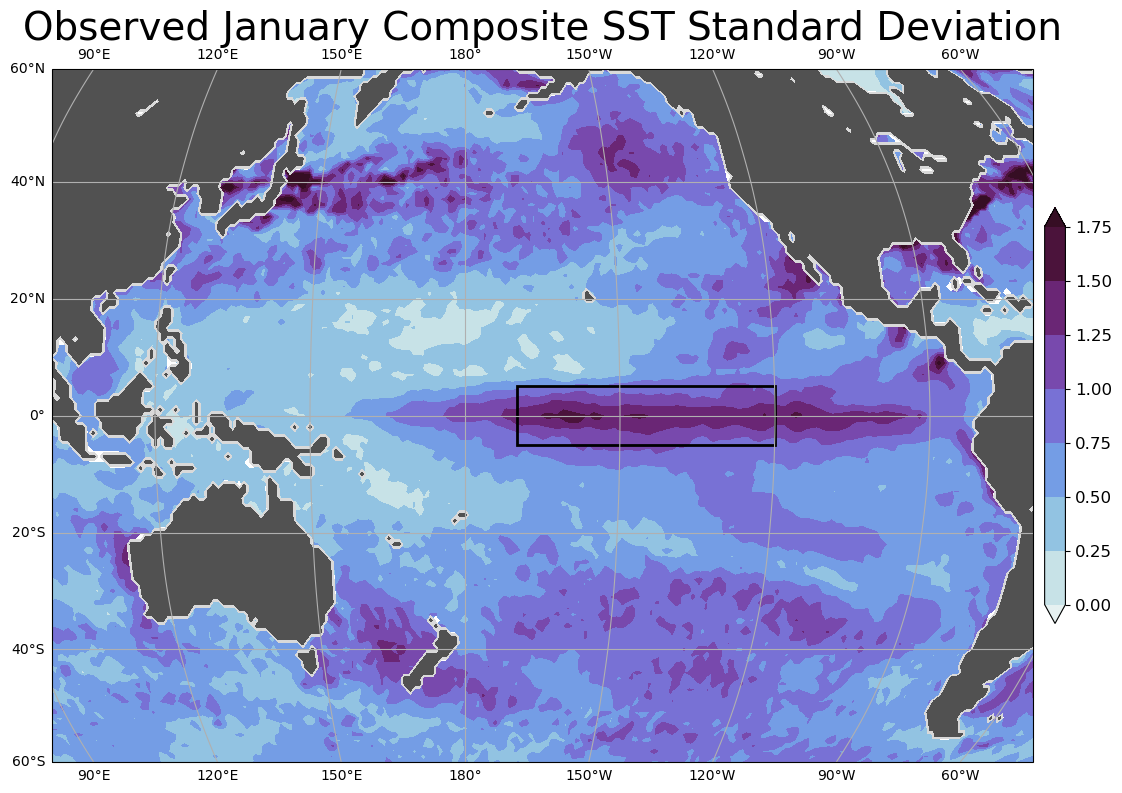

f
f


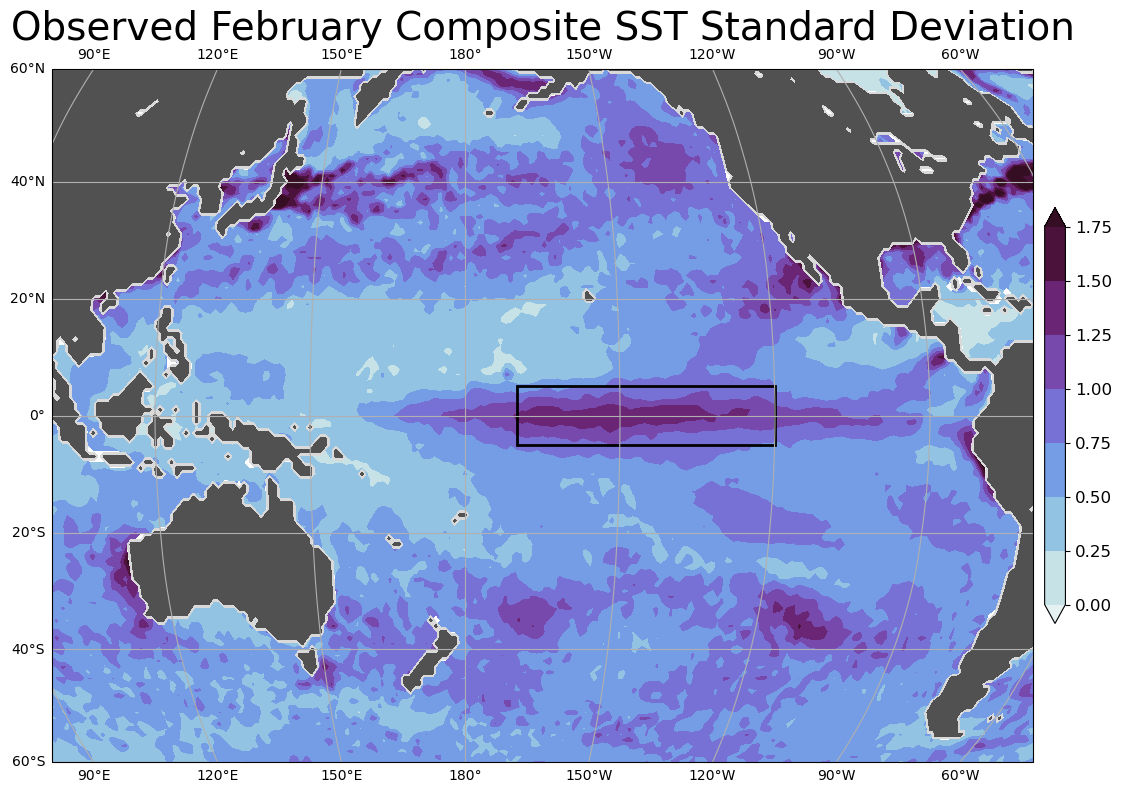

f
f


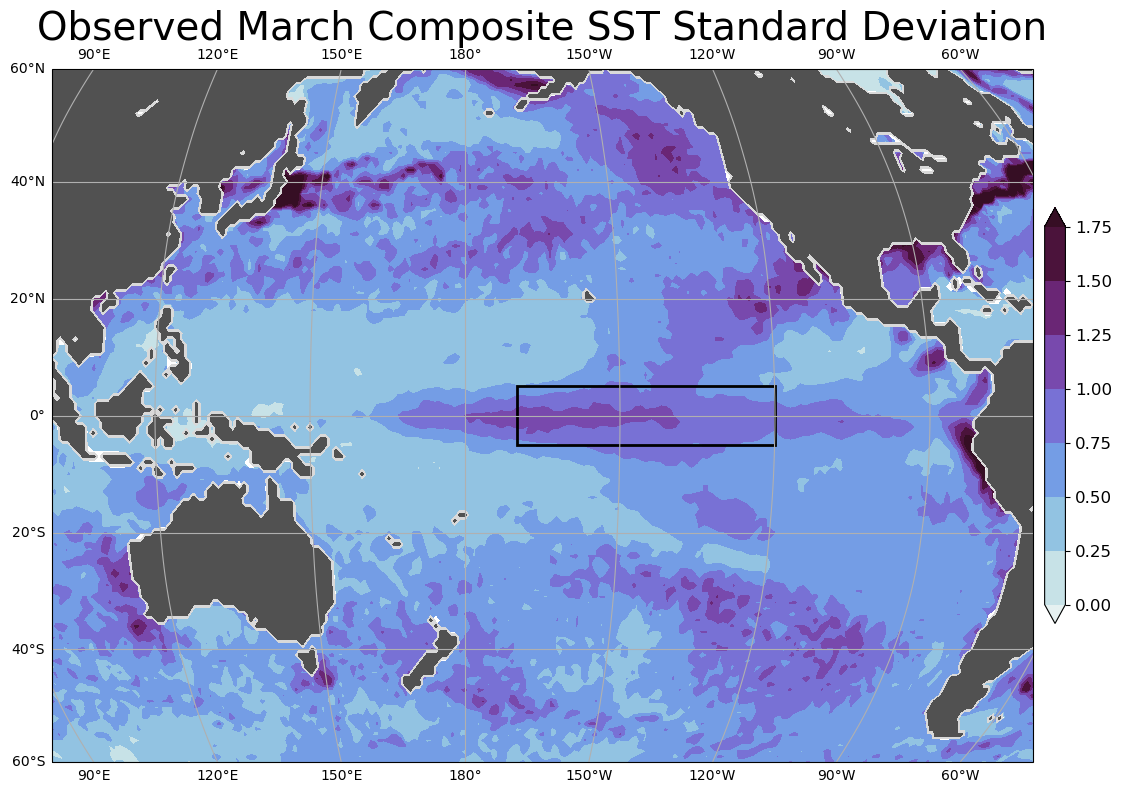

f
f


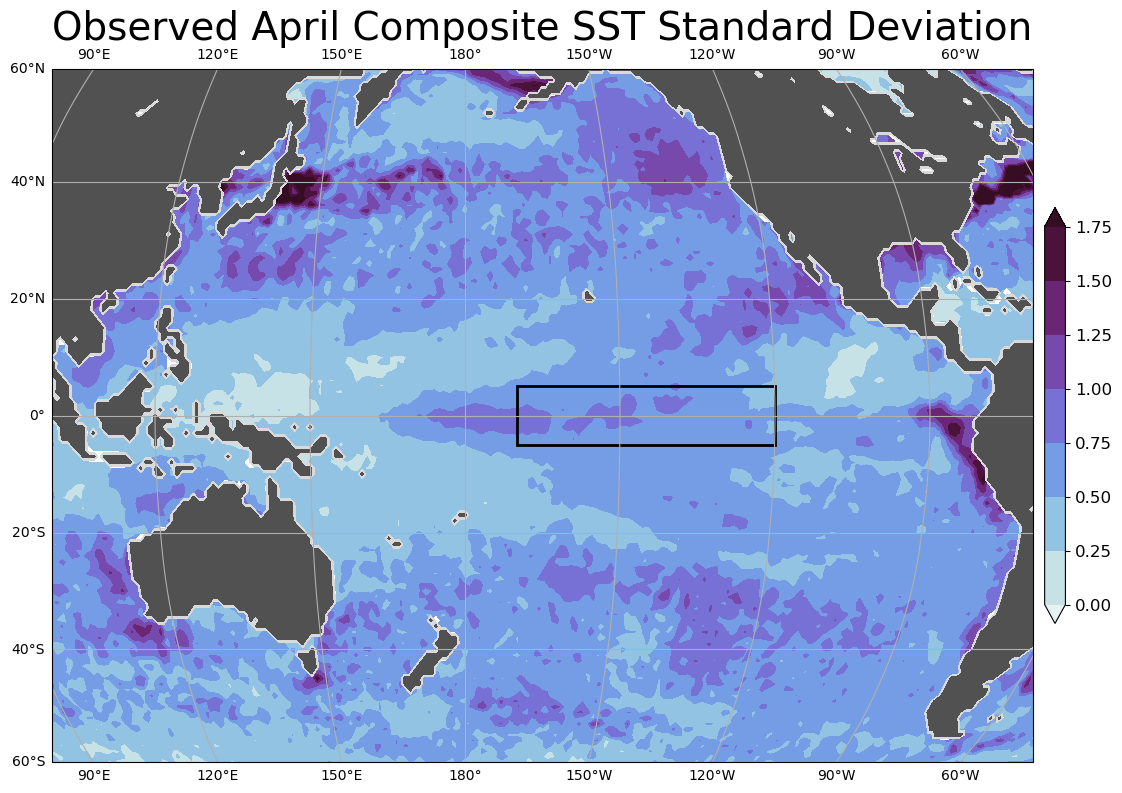

f
f


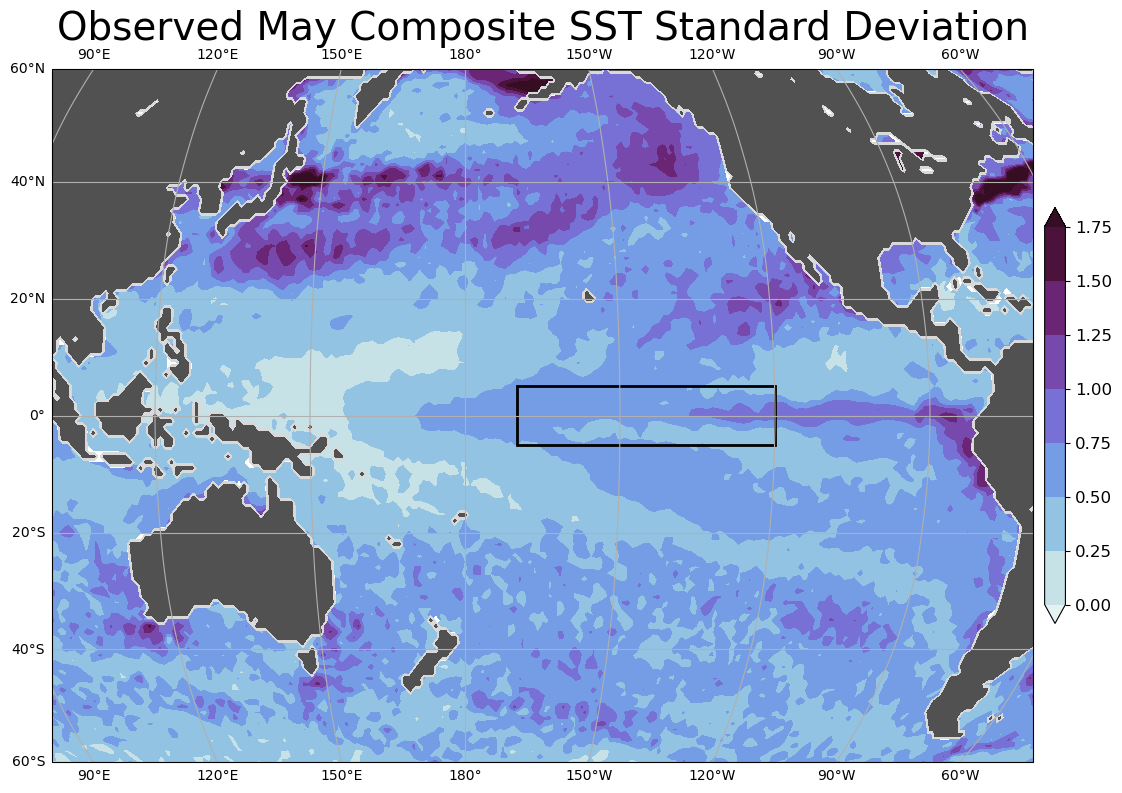

f
f


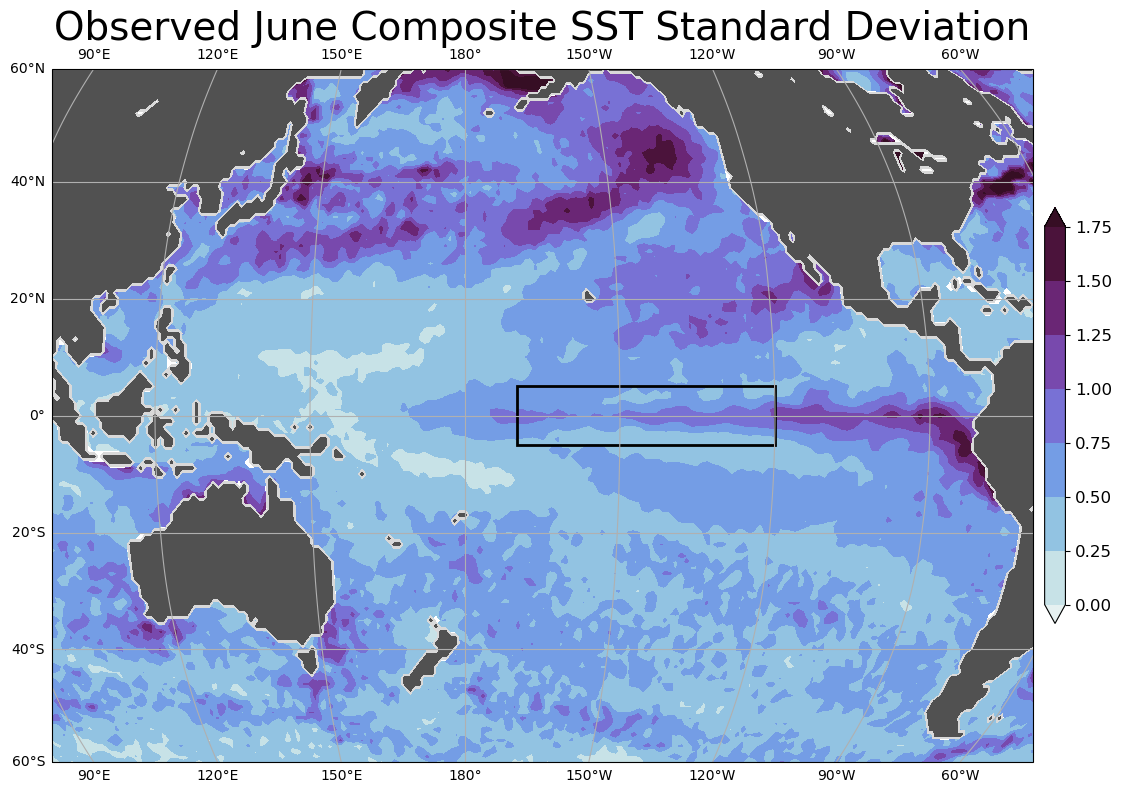

f
f


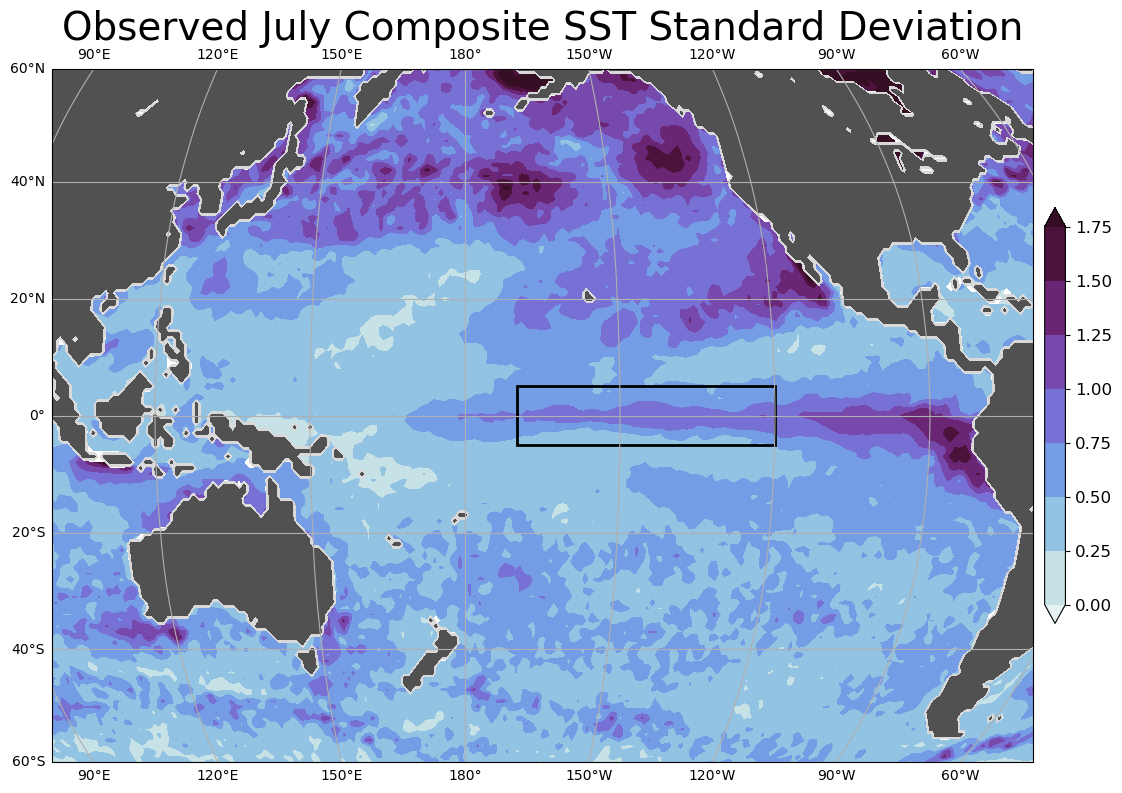

f
f


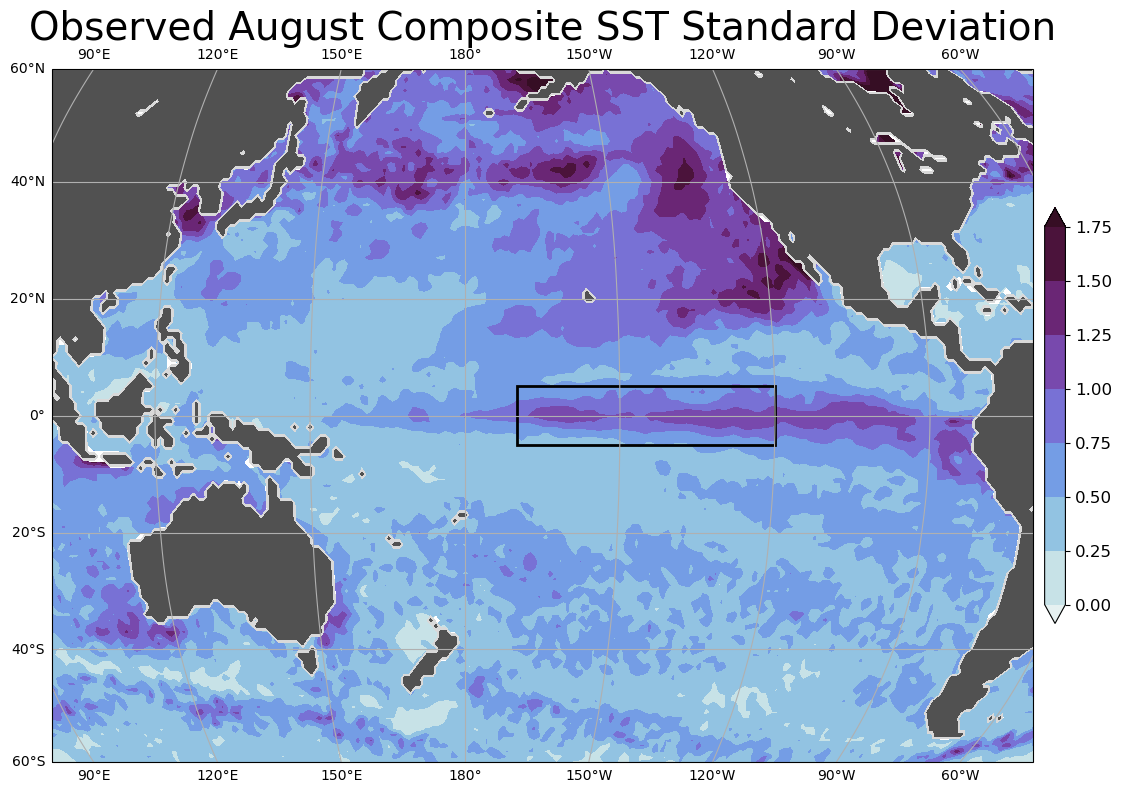

f
f


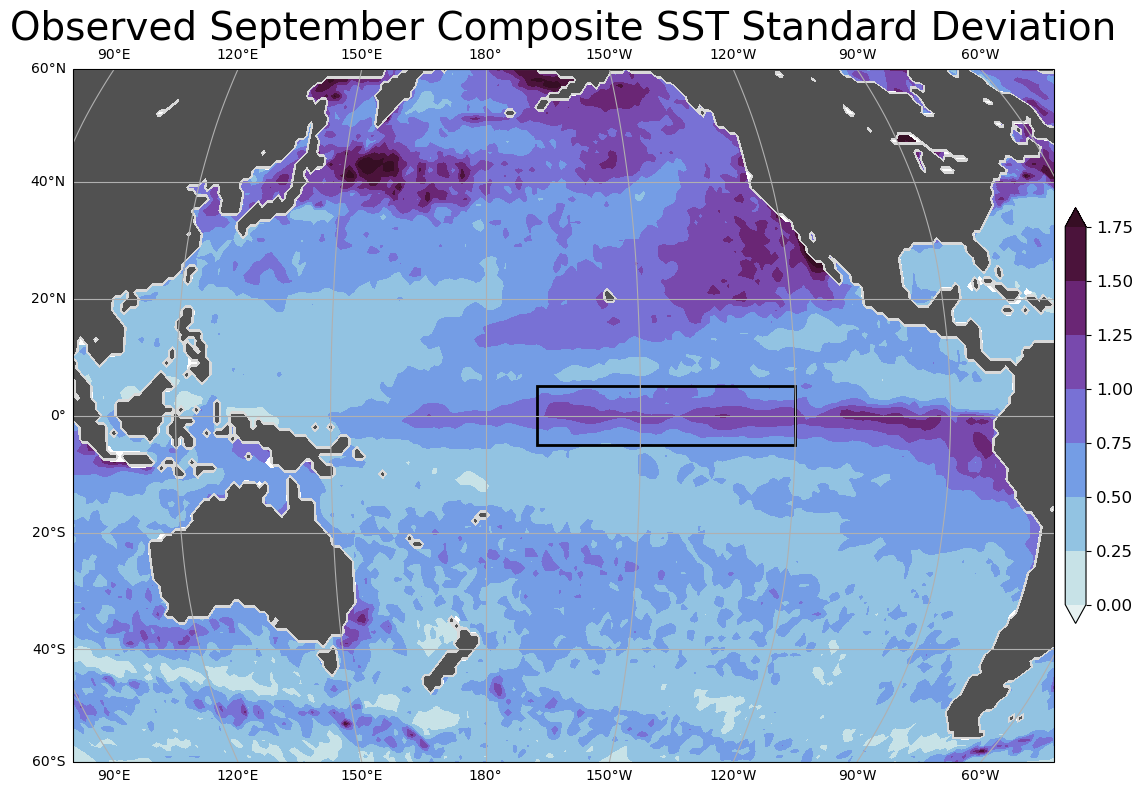

f
f


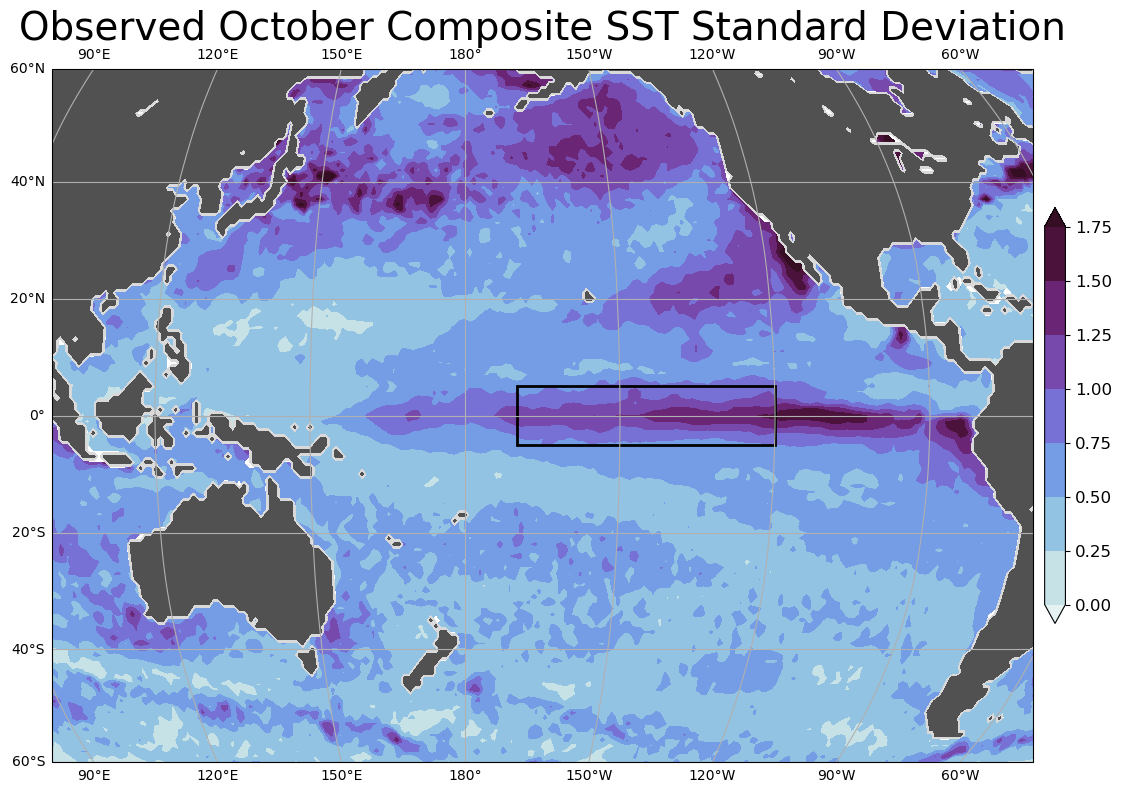

f
f


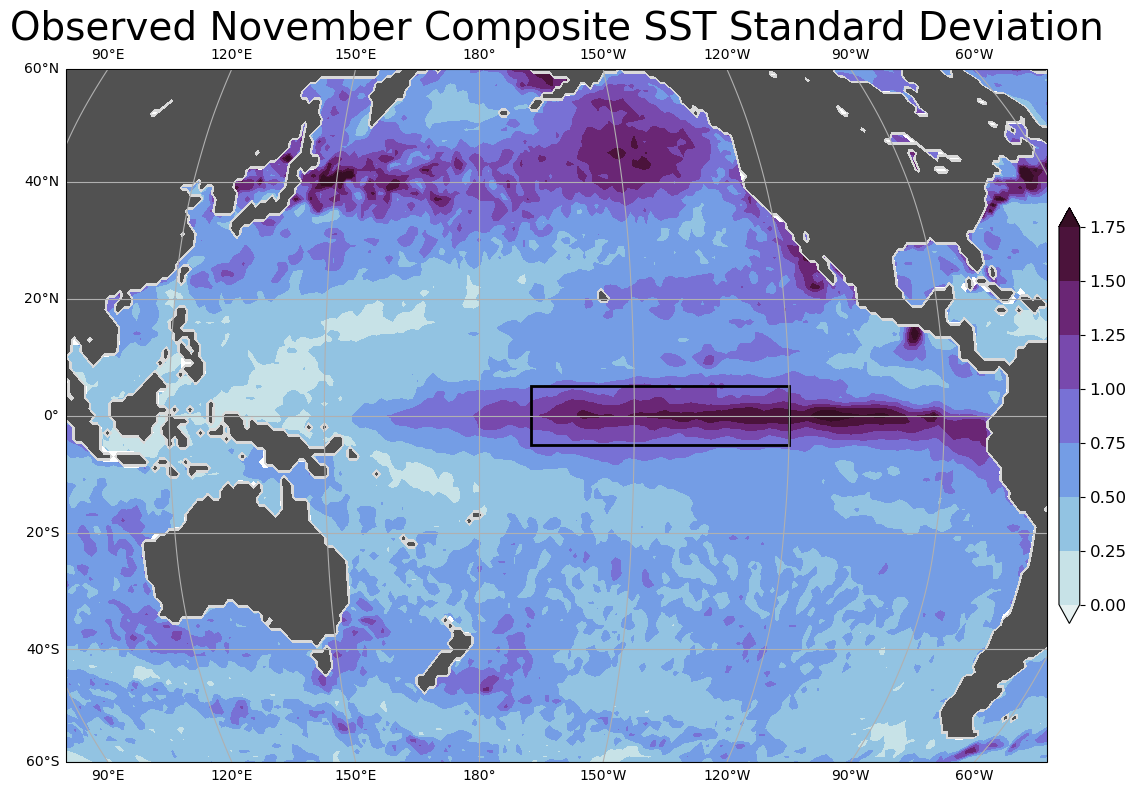

f
f


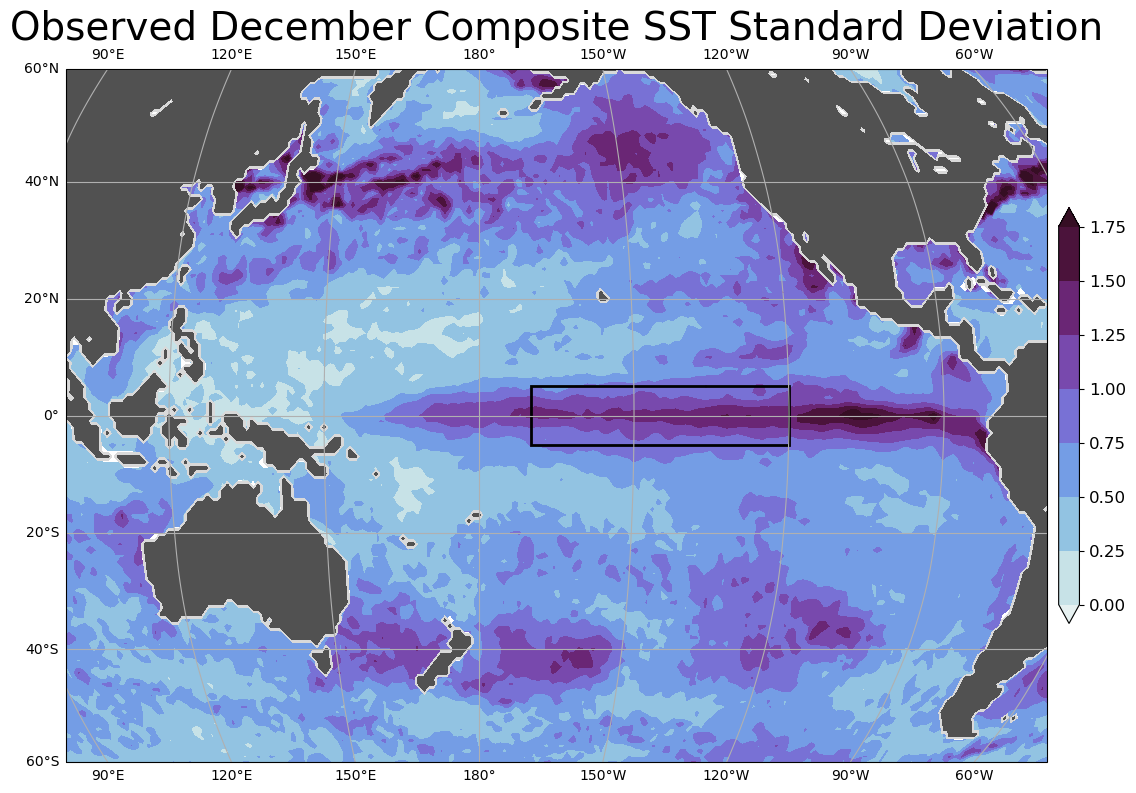

In [61]:
stads=[Janstd,Febstd, Marchstd,Aprilstd,Maystd,Junestd,Julystd,Augstd,Sepstd,Octstd,Novstd,Decstd ]
months=['January', 'February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    
    actualstd=stads[i]
    
    res='110m'
    fig=plt.figure(figsize=(15,9))
    ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
    ax.set_extent([100, 290, -60, 60], crs=ccrs.PlateCarree())
    #ax.add_feature(cfeat.COASTLINE.with_scale(res))

    # Plot a contour-filled variable
    print('f')
    CG=ax.contourf(lon,lat,actualstd,levels=np.arange(0,2,0.25), cmap=cmo.cm.dense,extend='both', transform=ccrs.PlateCarree())
    CF=ax.contourf(lon,lat,lsm,levels=np.arange(0.25,1.5,0.5), cmap='Greys', transform=ccrs.PlateCarree())
    print('f')
    cbar=plt.colorbar(CG,fraction=0.05, pad=0.01,shrink=0.6)
    cbar.ax.tick_params(labelsize=12)
    #cbar.ax.set_ylabel("SST (°C)", fontsize=14)
    ax.add_patch(mpatches.Rectangle(xy=[190, -5], width=50, height=10,
                                facecolor='none', edgecolor='k', linewidth=2,
                                transform=ccrs.PlateCarree()))
    ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))


    # Title
    title=ax.set_title("Observed " + str(months[i])+ " Composite SST Standard Deviation",fontsize=28)
    # plt.savefig("Surface Temp.png", format='png')
    picfile=str(months[i]) + ' Composite SST Standard Devaition' + '.png'
    plt.savefig(picfile, format='png')
    plt.show()
